<div style="background-color: green; color: black; padding: 10px; border-radius: 10px; font-size: 24px;">
  Overview
</div>

A sound wave fire extinguishing system is a novel method for extinguishing flames by using sound waves to disrupt the combustion process. Unlike traditional fire extinguishing methods that use water, foam, or chemicals, this method leverages low-frequency sound waves to suppress and extinguish fires. This idea has been explored in research and prototyped in experimental setups, particularly for use in specific environments where traditional methods might not be ideal, such as enclosed spaces or environments with sensitive equipment.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 5]

In [2]:
df = pd.read_excel('/kaggle/input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')

<div style="background-color: green; color: black; padding: 10px; border-radius: 10px; font-size: 26px;">
  Exploratory Data Analysis
</div>

In [3]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
df.shape

(17442, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


our dataset is containing 0 non-value

In [6]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [7]:
df.FUEL.value_counts()

FUEL
gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: count, dtype: int64

In [8]:
df.describe(include = ['object'])

,FUEL
count,17442
unique,4
top,gasoline
freq,5130


[Text(0, 0, 'non-Extinction'), Text(1, 0, 'Extinction')]

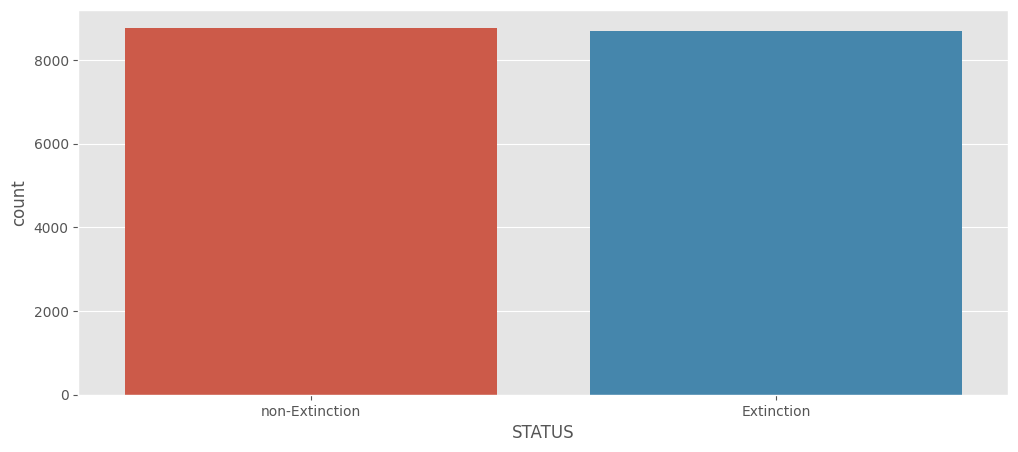

In [9]:
sns.countplot(data = df, x = df['STATUS'])
new_labels = ['non-Extinction', 'Extinction']
plt.gca().set_xticklabels(new_labels)

# Credit:

https://www.kaggle.com/code/mohamedelghannam15/acoustic-fire-extinguisher